# Mini Project 5 - Exploration Data Analysis and Visualization

Exploratory data analysis (EDA) is an approach for summarizing and visualizing the important characteristics of a data set. It gives us more understanding of the data’s underlying structure and variables before feature engineering, formal modeling, model tuning, and other data analysis techniques. In this mini project, you will be introduced to some ways to explore data efficiently with different packages so that you can develop intuition about your data set:
* Import and briefly check data with python data manipulation tools Pandas
* Get basic description of data, descriptive statistics, checking rows and columns.
* Time series analysis
* Simple predictive modeling
* Discover patterns in data by visualizing data with python data visualization packages sucha as Matplotlib, and Seaborn, or by using functions to compute the correlation between features.

The dataset we will use in this mini project comes from Duolingo, which is the world's most popular platform to learn a language. You can download and check the 13 million Duolingo student learning traces from the website: <br/>
https://github.com/duolingo/halflife-regression

### General Philosophy and Steps for this mini project
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on your intuition
 - Visualization: Test you intuition and hypothesis using python visualization packages, such as Matplotlib.

## Duolingo Exploratory Data Analysis

In [3]:
# Import all dependencies we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import datetime as dt
import seaborn as sns
%matplotlib inline 

In [4]:
# avaliable plot styles
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


### Import data

In [5]:
# Since this dataset is 1.3G and we only take a look of first 1000000 rows #
df = pd.read_csv('learning_traces.csv', nrows=1000000)

In [4]:
# Print out the head of our dataset
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [5]:
# Check the infomation of our data, such as columns, data type #
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [6]:
# Dimension of dataset #
df.shape

(1000000, 12)

In [7]:
df.dtypes

p_recall             float64
timestamp              int64
delta                  int64
user_id               object
learning_language     object
ui_language           object
lexeme_id             object
lexeme_string         object
history_seen           int64
history_correct        int64
session_seen           int64
session_correct        int64
dtype: object

#### Please try to answer the following questions when you follow the data visualization procedures below:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features  

### Numerical data

In [8]:
# list all types that only take numerical ones
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

#### 1. Create a dataframe that only takes numerical data and show the head

In [13]:
# hint: df.select_dtypes() which you could select numerical data types

In [26]:
# num_var= list(df.dtypes[df.dtypes=='int64'])+list(df.dtypes[df.dtypes=='float64']) # Making a list, not applicable here 

In [9]:
num_var=df.select_dtypes(exclude=['object'])

In [37]:
num_var.head()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,6,4,2,2
1,0.5,1362076081,27649635,4,4,2,1
2,1.0,1362076081,27649635,5,4,1,1
3,0.5,1362076081,27649635,6,5,2,1
4,1.0,1362076081,27649635,4,4,1,1


In [10]:
num_var.dtypes

p_recall           float64
timestamp            int64
delta                int64
history_seen         int64
history_correct      int64
session_seen         int64
session_correct      int64
dtype: object

#### 2. Draw histgrams to show the distributions of all the numerical data from the dataframe we just created.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e253e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ef949e8>]], dtype=object)

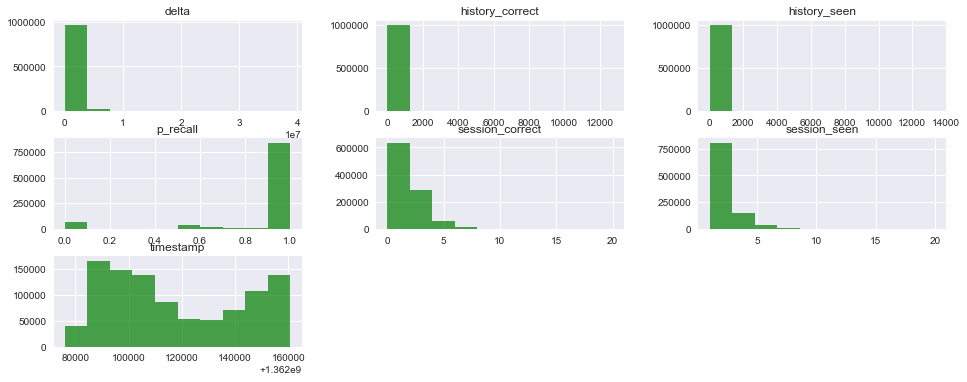

In [11]:
fig = plt.figure(figsize=[16,6])
num_var.hist(figsize = (16,6),color='g',alpha=0.7) # for dataframe

### Feature to feature relationship

Trying to plot all the numerical features in a pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

#### 3. Compute pairwise correlation matrix of numerical columns and draw a heatmap using seaborn plot

hint: the heatmap may look like this
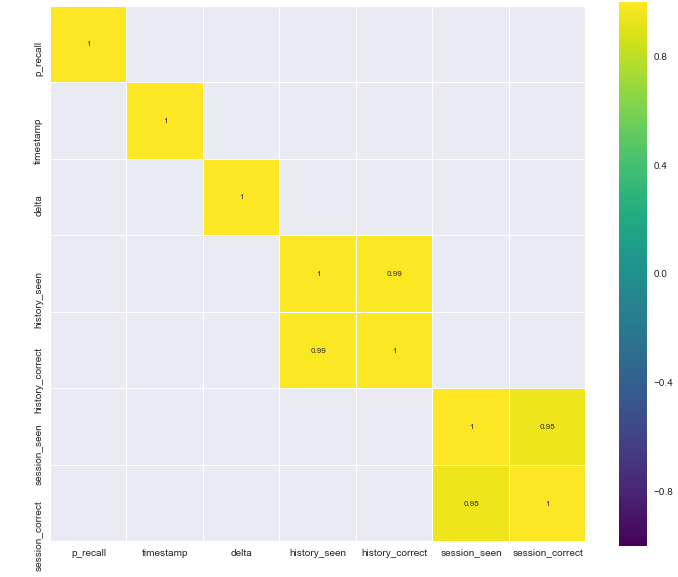

In [ ]:
# hint：corr(), sns.heatmap()

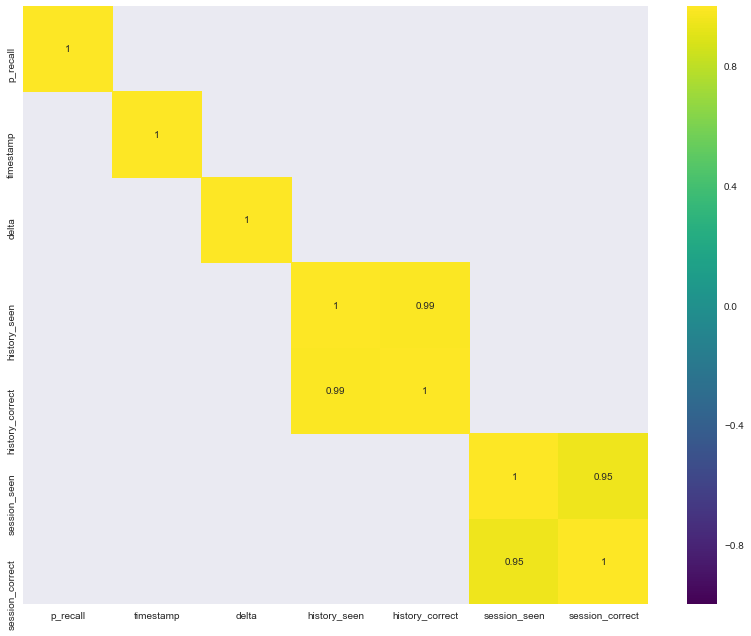

In [41]:
plt.figure(figsize=(14,11))
num_corr = num_var.corr()
ax = sns.heatmap(num_corr,annot=True,cmap='viridis',mask= num_corr < 0.95 )


### Categorical data - Countries

#### 1. What are user interface languages? 

In [48]:
name_language=df.ui_language.unique()
name_language
# 4 types of languages

array(['en', 'pt', 'es', 'it'], dtype=object)

#### 2. Do a value_counts() to see how popular each interface language is

In [49]:
uil_count=df.ui_language.value_counts()
uil_count
# English is the most popular 

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

#### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

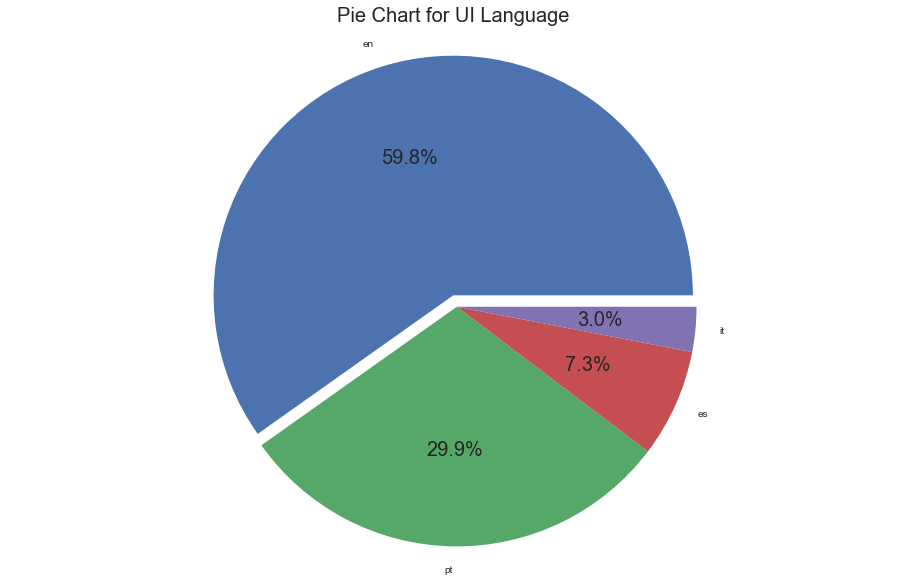

In [94]:
# hint: showing percentage, add autopct parameter
# Type you answer below 
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.pie(uil_count,explode=(0.05,0,0,0),labels=name_language,autopct= '%1.1f%%')
ax.set_title('Pie Chart for UI Language',fontdict={'fontsize':20})
plt.rcParams['font.size'] = 30  #change number font size: 
plt.axis('equal') # if not, the plot is not birdview angle
plt.show()
# Q: how to change label font size?

#### 4. Draw a pie plot of languages that individuals are learnging

In [33]:
# Type you answer below 
ind_lan= df.learning_language.unique()
ind_lan

array(['de', 'es', 'pt', 'en', 'fr', 'it'], dtype=object)

In [34]:
lan_count = df.learning_language.value_counts()
lan_count

en    401877
es    259818
fr    148692
de    112709
it     54147
pt     22757
Name: learning_language, dtype: int64

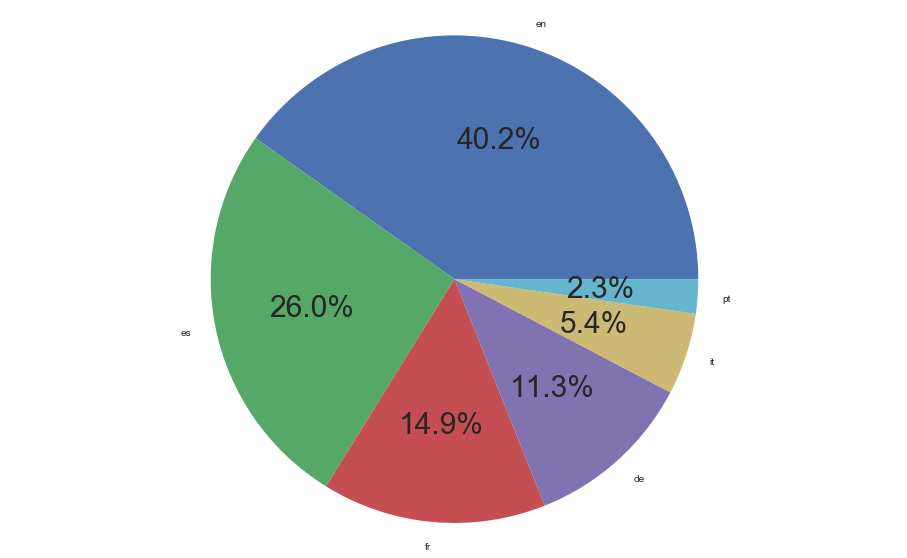

In [39]:
# easy way
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.pie(lan_count,labels=['en','es','fr','de','it','pt'],autopct ='%1.1f%%')
plt.rcParams['font.size'] = 28
plt.axis('equal')
plt.show()

#### 5. Pie plot to visualize what languages being learned by people whose interface language is English

In [13]:
# you want to show the learning language based on people whose interface language is English
# Type you answer below 

# select all columns where ui is Englihs -> df_en
df_en= df[df.ui_language=='en']
df_count=df_en.learning_language.value_counts() # learning language to those ppl
df_count

es    259818
fr    148692
de    112709
it     54147
pt     22757
Name: learning_language, dtype: int64

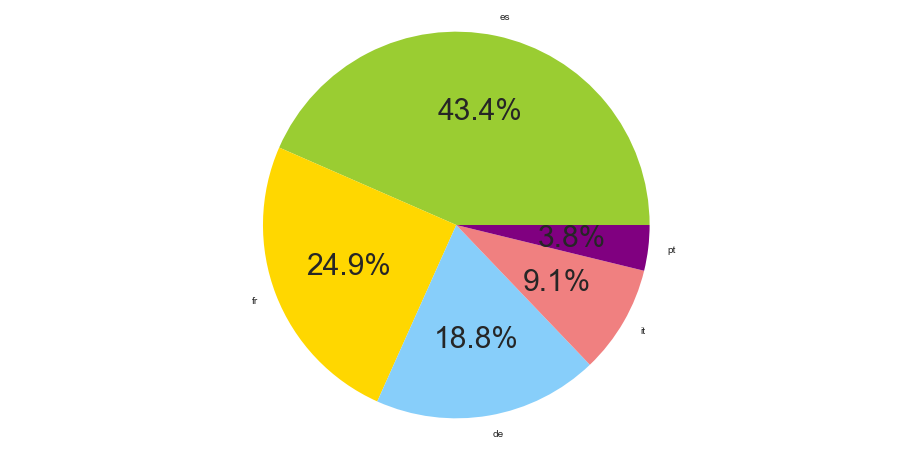

In [45]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

ax.pie(df_count,labels=['es','fr','de','it','pt'],autopct='%1.1f%%',colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','purple'])
plt.axis('equal')
plt.rcParams['font.size']= 30
plt.show()  

# Q: where to find the color codes ?

#### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

In [87]:
df_es=df[df.ui_language=='es']
df_it=df[df.ui_language=='it']
df_pt=df[df.ui_language=='pt']

es_count=df_es.learning_language.value_counts()
it_count=df_it.learning_language.value_counts()
pt_count=df_pt.learning_language.value_counts()

es_count,it_count,pt_count

# is it a nicer coding style here if writing a for loop? although I don't think it is necessary

(en    298705
 Name: learning_language, dtype: int64, en    30296
 Name: learning_language, dtype: int64, en    72876
 Name: learning_language, dtype: int64)

(-1.1000000000000001,
 1.1000000000000001,
 -1.1000000000000001,
 1.1000000000000001)

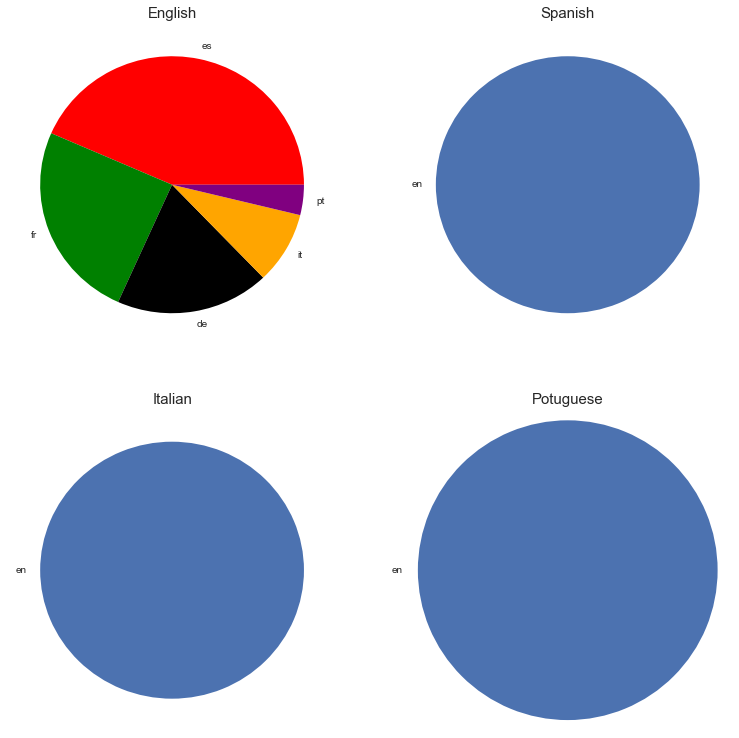

In [100]:
fig = plt.figure(figsize=(13,13))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.pie(df_count,labels=['es','fr','de','it','pt'],colors=['red','green','black','orange','purple'])
ax1.set_title('English',fontdict={'fontsize':15})
ax2.pie(es_count,labels=['en'])
ax2.set_title('Spanish',fontdict={'fontsize':15})
ax3.pie(it_count,labels=['en'])
ax3.set_title('Italian',fontdict={'fontsize':15})
ax4.pie(pt_count,labels=['en'])
ax4.set_title('Potuguese',fontdict={'fontsize':15})

plt.axis('equal')
# Q1: ax1.text('{0}'.format(str('es')),fontdict={'fontsize':10},x= ?,y? ). What to put in required x & y to change text 
# font size

# Q2: why after doing the same thing to all, the last plot has bigger size?

#### hint: result plot would look like this
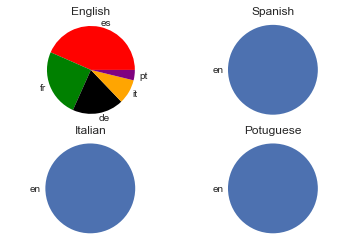

## Users Activity patterns

#### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [101]:
# hint: summary statistics use describe() function 
# Type you answer below 
df.session_seen.describe()

count    1000000.000000
mean           1.788163
std            1.333740
min            1.000000
25%            1.000000
50%            1.000000
75%            2.000000
max           20.000000
Name: session_seen, dtype: float64

In [102]:
df.session_seen.value_counts()

1     596858
2     208146
3     101697
4      48155
5      23301
6      10581
7       4763
8       2410
9       1443
10       989
11       487
12       296
13       238
16       224
14       204
15       135
19        25
17        20
18        15
20        13
Name: session_seen, dtype: int64

#### 2. Compute the duration of dataset

In [6]:
# hint: maximum timestamp minus minimum timestamp
# Type you answer below 
duration = max(df.timestamp)-min(df.timestamp)
duration
# what's the unit?

84602

## Boxplots

#### 3. Compare activity levels for people with different 4 user interface languages by drawing boxplots

In [117]:
# hint: df[df.ui_language == 'en']['user_id'].value_counts()/duration
# Four different ui languages are : 'en', 'pt', 'es', 'it'
activity1 = df[df.ui_language == 'en']['user_id'].value_counts()/duration
activity2 = df[df.ui_language == 'pt']['user_id'].value_counts()/duration
activity3 = df[df.ui_language == 'es']['user_id'].value_counts()/duration
activity4 = df[df.ui_language == 'it']['user_id'].value_counts()/duration

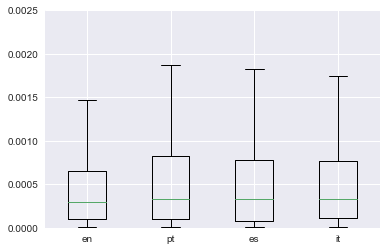

In [166]:
plt.figure(figsize=(16,10))
fig, ax = plt.subplots()
data=[activity1,activity2,activity3,activity4]
labels = ['en', 'pt', 'es', 'it']
ax.boxplot(data,labels=labels)
ax.set_ylim([0,0.0025])
plt.show()

#### 4. Do the same thing but setting ylim to 0-10, which plot would be seen more clearly

In [ ]:
# Type you answer below 
# Answer:  The previous would be seen more clearly,since when y =10,the boxplots are too small

####  5. Another way to zoom in instead of setting ylim is to take a log scale on the boxplot

In [188]:
# hint: log scale on y
# Type you answer below 
act1_log= np.log10(activity1)
act2_log= np.log10(activity2)
act3_log= np.log10(activity3)
act4_log= np.log10(activity4)

# Q: I tried np.log10(data) but it failed. How to apply log to the list [activity1,activity2,activity3,activity4] ? 

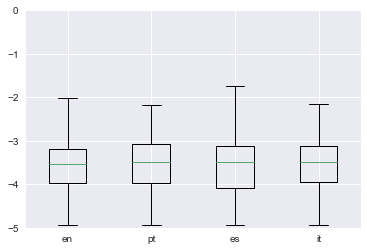

In [197]:
plt.figure(figsize=(16,10))
fig, ax = plt.subplots()
data=[act1_log,act2_log,act3_log,act4_log]
labels = ['en', 'pt', 'es', 'it']
ax.boxplot(data,labels=labels)
ax.set_ylim([-5,0])
plt.show()

## Regression and predictive tasks

In [11]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


#### 1. Scatter plot the relation between session_seen and p_recall

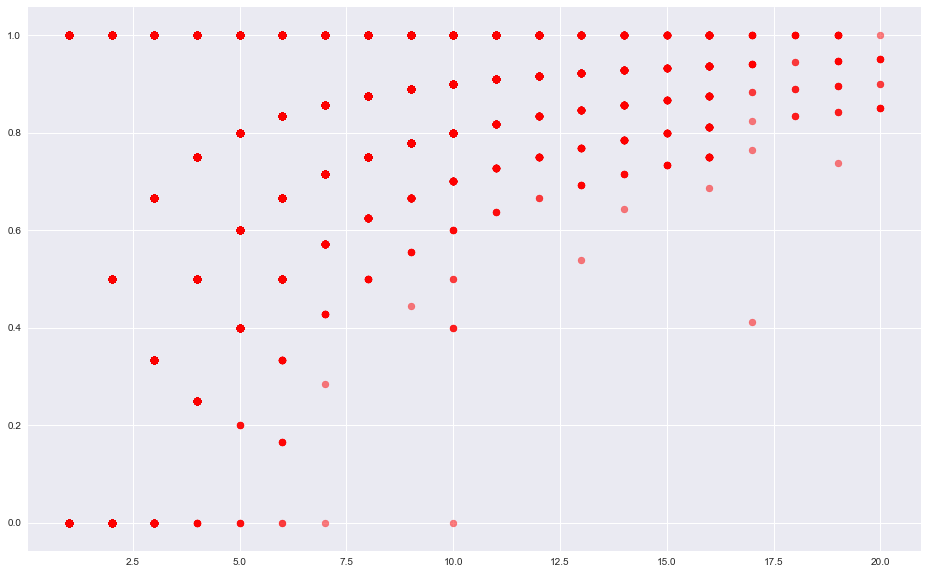

In [204]:
# Type you answer below 
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(x=df.session_seen,y=df.p_recall,c='red',alpha=0.5)

#### 2. Scatter plot the same distribution with log scale. 

/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


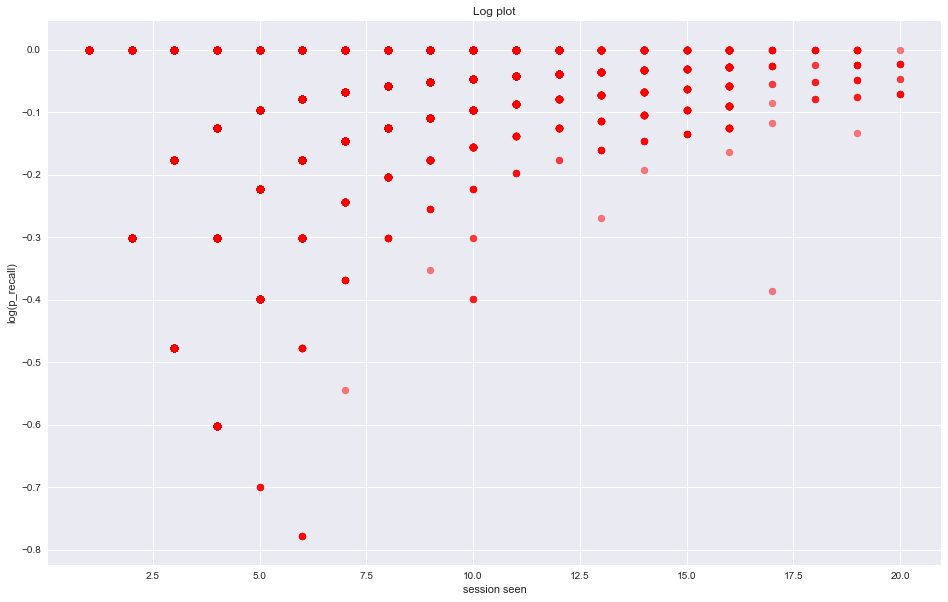

In [211]:
# Type you answer below 
y_log = np.log10(df.p_recall)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(x=df.session_seen,y=y_log,c='red',alpha=0.5)
ax.set_title('Log plot')
ax.set_xlabel('session seen')
ax.set_ylabel('log(p_recall)')

# Q: I remember my teacher in Stat class said we do log transformation only on respond varieble? is that what it is here?

#### 3. Goupby session_seen and take aveage on it as x, and scatter plot relation with p_recall as y

In [237]:
# hint: use groupby(), and mean() functions
# Type you answer below 
grp1 = df.groupby(df.session_seen).mean()
grp1.head()

,p_recall,timestamp,delta,history_seen,history_correct,session_correct
session_seen,,,,,,
1,0.882656,1.362118e+09,633330.605122,20.505715,18.006955,0.882656
2,0.909965,1.362117e+09,554200.427243,24.734331,21.928978,1.819929
3,0.917841,1.362117e+09,603689.882789,21.985319,19.513909,2.753523
4,0.916608,1.362117e+09,627335.939944,22.576908,20.142228,3.666431
5,0.912922,1.362117e+09,654142.095146,19.664092,17.425776,4.564611


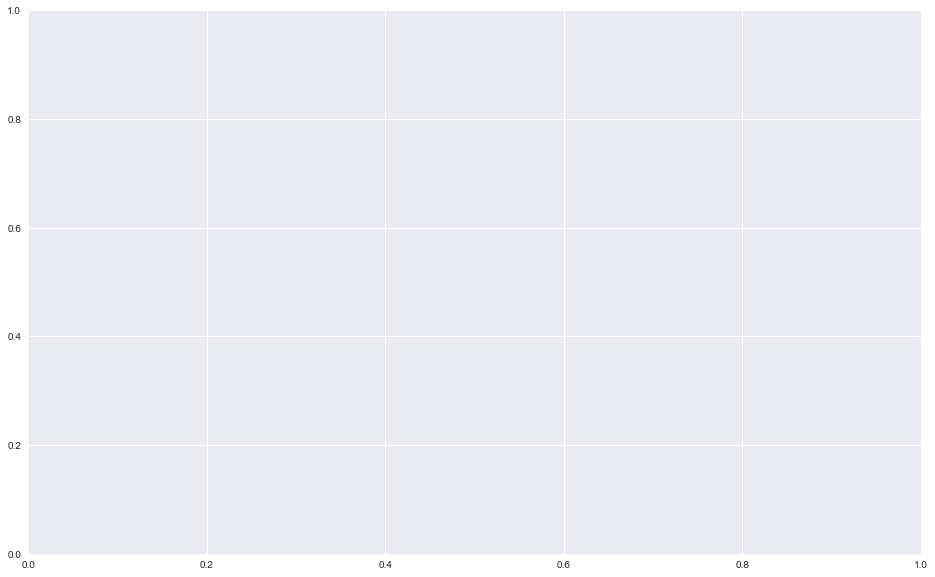

In [238]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
#plt.scatter(x=grp1,y=grp1.p_recall,c='green')

# Q: Did not understand what the problem is asking. The mean is to the whole table? 

#### 4. Goupby history_seen and take aveage on it as x, and scatter plot relation with p_recall as y

In [239]:
# Type you answer below 
grp2 = df.groupby(df.history_seen).mean()
grp2.head()

#Q : same problem, did not understand what the problem is asking for 

,p_recall,timestamp,delta,history_correct,session_seen,session_correct
history_seen,,,,,,
1,0.889608,1.362118e+09,968997.132998,1.000000,1.518238,1.358558
2,0.893621,1.362118e+09,825389.249658,1.794548,1.730931,1.559786
3,0.893972,1.362118e+09,828003.734880,2.706472,1.848409,1.669791
4,0.894606,1.362117e+09,618837.480044,3.559635,1.873270,1.690370
5,0.894843,1.362117e+09,624323.007777,4.442591,1.791314,1.616713


#### 5. Scatter plot the relation history_seen and p_recall when session_seen is greater than 5

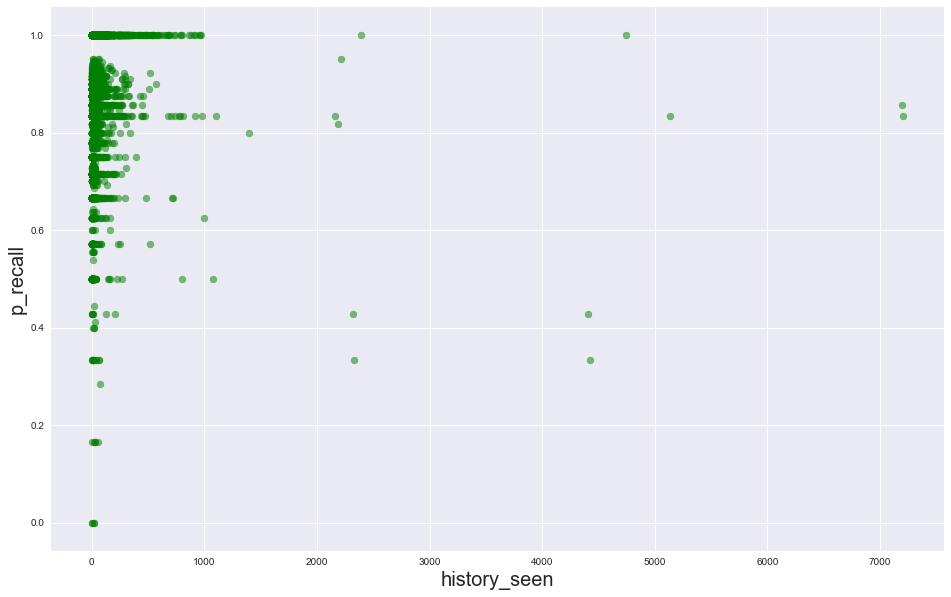

In [246]:
# Type you answer below 
df_ss = df[df.session_seen>5]

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
plt.scatter(x=df_ss.history_seen,y=df_ss.p_recall,c='green',alpha=0.5)
ax.set_xlabel('history_seen',fontdict={'fontsize': '20'})
ax.set_ylabel('p_recall',fontdict={'fontsize': '20'})

#### 6. Hexbin plot the relation between history_seen and p_recal with log scale

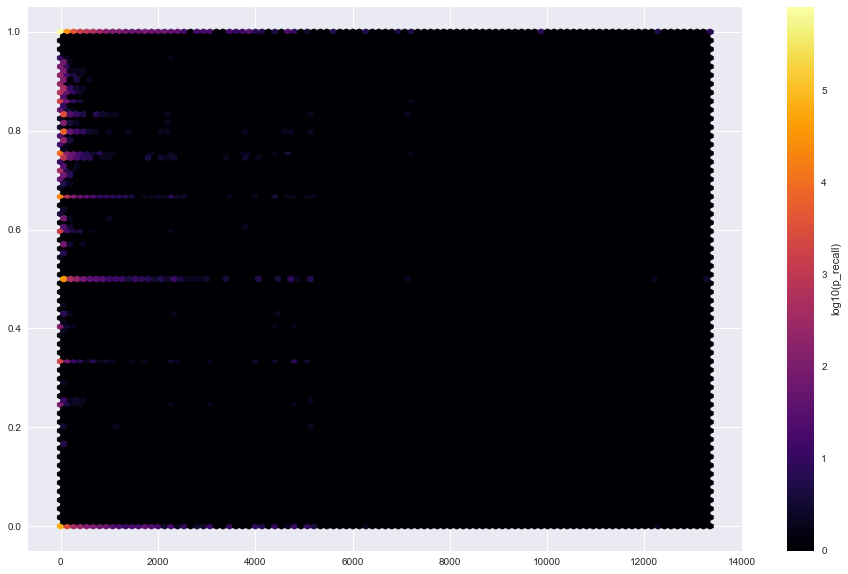

In [261]:
# hint: hexbin()
# Type you answer below 
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)

hb = ax.hexbin(x=df.history_seen,y=df.p_recall,cmap='inferno',bins='log')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(p_recall)')

plt.show()

#### 7. Create a dataframe with user_id and user_activity based on user_id index

In [8]:
# create an empty dataframe and set index to user_id
# Type you answer below 
user_activity = df['user_id'].value_counts()/duration
df2 = pd.DataFrame(index= df.user_id)
df2['user_activity']=user_activity
df2.head()

,user_activity
user_id,
u:FO,0.000366
u:FO,0.000366
u:FO,0.000366
u:FO,0.000366
u:FO,0.000366


In [9]:
df2['user_id']=df2.index
df2.head()

,user_activity,user_id
user_id,,
u:FO,0.000366,u:FO
u:FO,0.000366,u:FO
u:FO,0.000366,u:FO
u:FO,0.000366,u:FO
u:FO,0.000366,u:FO


#### 8. Merge dataframe a onto original dataframe

In [10]:
# hint: merge(), pay attention to how to merge(inner, outer....)
# Type you answer below 
df_merge=df2.merge(df,on='user_id',how='outer')
df_merge.head()

,user_activity,user_id,p_recall,timestamp,delta,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,0.000366,u:FO,1.0,1362076081,27649635,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.000366,u:FO,0.5,1362076081,27649635,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,0.000366,u:FO,1.0,1362076081,27649635,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.000366,u:FO,0.5,1362076081,27649635,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,0.000366,u:FO,1.0,1362076081,27649635,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


#### 9. Get summary statistics of p_recall when user_activity is less than 8 and greater than 59 respectively

In [11]:
df_merge[df_merge.user_activity <8].p_recall.describe()

count    1.628683e+08
mean     8.822141e-01
std      2.985078e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: p_recall, dtype: float64

In [10]:
df_merge[df_merge.user_activity >59].p_recall.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: p_recall, dtype: float64

#### 10. Hexbin plot the relation between delta and p_recall with log scale

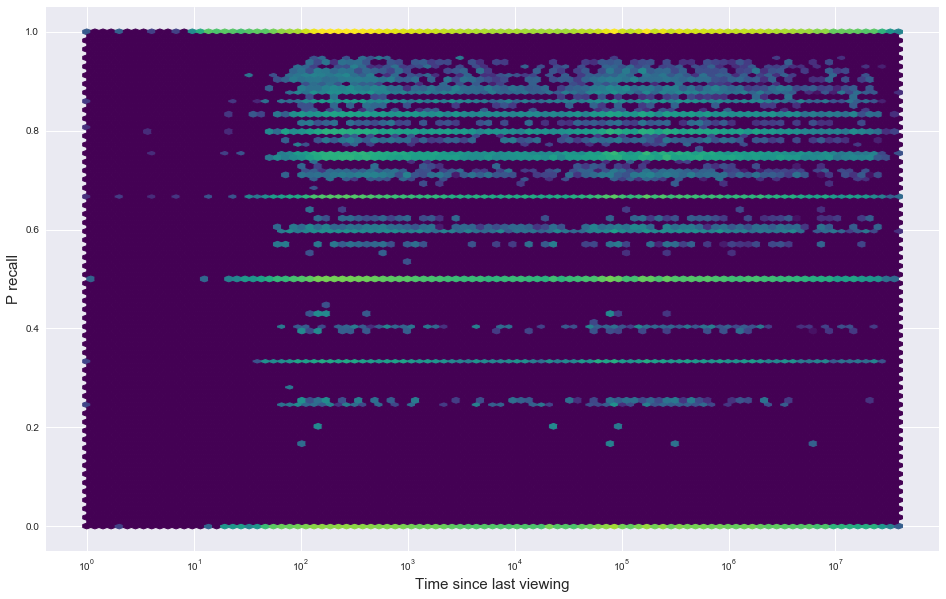

In [29]:
# Type you answer below 
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)

hb = ax.hexbin(x=df_merge.delta,y=df_merge.p_recall,cmap='viridis',xscale='log',bins='log')
ax.set_xlabel('Time since last viewing',fontdict = {'fontsize': '15'})
ax.set_ylabel('P recall',fontdict = {'fontsize': '15'})

plt.show()
# with bins ='log' statement, are we taking log to the data?

#### hint: hexbin plot would look like this 
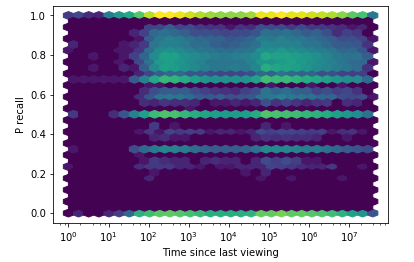

#### 11. Scatter plot relation between user_activity and delta

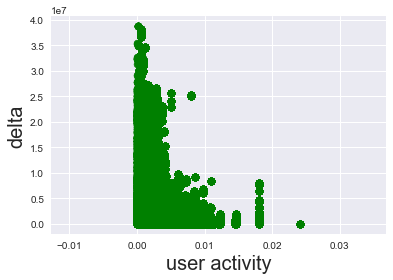

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.scatter(x=df_merge.user_activity,y=df_merge.delta,c='green',alpha=0.5)
ax.set_xlabel('user activity',fontdict={'fontsize': '20'})
ax.set_ylabel('delta',fontdict={'fontsize': '20'})

#### 12. Hexbin plot the relation between user_activity and delta with log scale

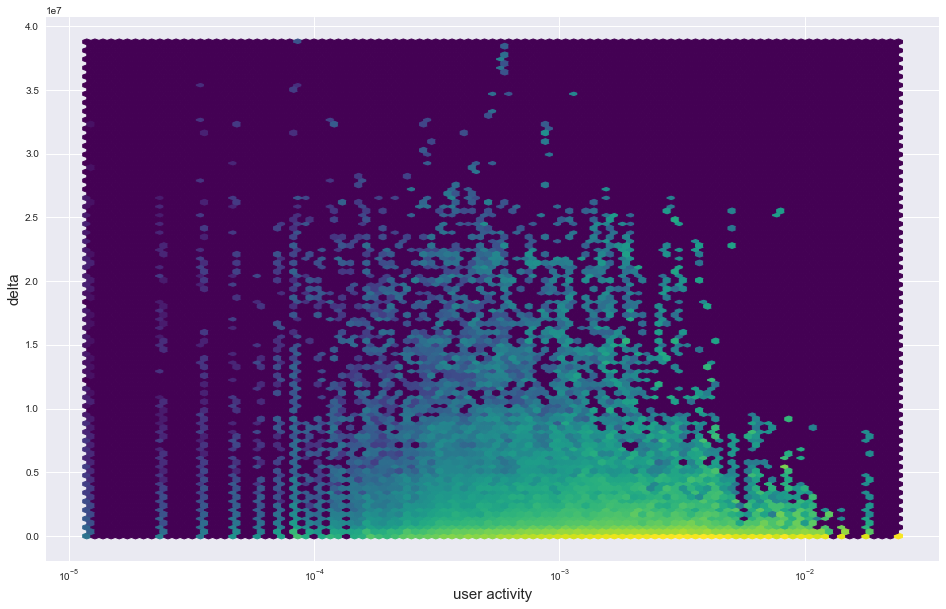

In [33]:
# Type you answer below 
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)

hb = ax.hexbin(x=df_merge.user_activity,y=df_merge.delta,cmap='viridis',xscale='log',bins='log')
ax.set_xlabel('user activity',fontdict = {'fontsize': '15'})
ax.set_ylabel('delta',fontdict = {'fontsize': '15'})
#cb = fig.colorbar(hb, ax=ax)
#cb.set_label('log10(p_recall)')

plt.show()

## Temporal patterns and Time Series

#### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [12]:
dff = df_merge[['user_activity','timestamp']]
dff.head()

,user_activity,timestamp
0,0.000366,1362076081
1,0.000366,1362076081
2,0.000366,1362076081
3,0.000366,1362076081
4,0.000366,1362076081


In [13]:
dff.index = dff['timestamp']
del dff['timestamp']
dff.head()

,user_activity
timestamp,
1362076081,0.000366
1362076081,0.000366
1362076081,0.000366
1362076081,0.000366
1362076081,0.000366


In [ ]:
# It took so long and my cumputer had died several times for this.
dff.plot()
plt.show()

In [25]:
# You can use datetime library to convert timestamp to actual datetime
dt.datetime.fromtimestamp(df_merge.timestamp.min())

#### 2. Visualize each interface language users daily activity pattern onto a single plot. 

In [32]:
# hint: use rolling window here
??


In [26]:
# Create a df= ts with columns timestamp, ui_language, user_activty  group by timestamp
ts = df_merge[['ui_language','timestamp','user_activity']]


In [30]:
ts.user_activity.describe()

count    1.628683e+08
mean     4.770355e-03
std      4.786332e-03
min      1.182005e-05
25%      1.678447e-03
50%      3.155954e-03
75%      6.158247e-03
max      2.412473e-02
Name: user_activity, dtype: float64

/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734927.436123, right=734927.436123
  'left=%s, right=%s') % (left, right))


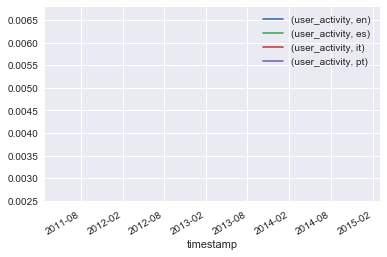

In [31]:
ts.groupby([ts.timestamp.name, ts.ui_language.name]).mean().unstack().plot()
plt.legend(loc='best')
# y axis value is different, might have calculated wrong 

#### hint: result plot would look like this
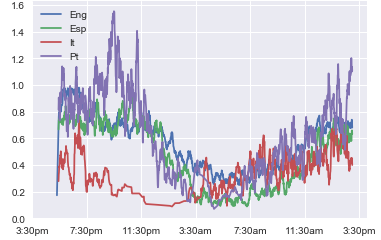